### Coding-Exercise 3


In [258]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import random
from IPython.display import HTML

In [259]:
M = 2
C = 3
N_POINTS = 100

XLIM = (-5, 5)
YLIM = (-5, 5)

In [260]:
def generate_datapoints(m=M, c=C):
    A = np.array([random.uniform(-5, 5) for i in range(N_POINTS)])
    B = m * A + c + np.array([random.uniform(-1, 1) for i in range(N_POINTS)])
    return A, B

In [261]:
def error(x, a, b):
    return b - a * x[0] - x[1]


def loss_func(x, A, B):
    return np.mean([error(x, a, b) ** 2 for a, b in zip(A, B)])


def gradient(x, a, b):
    return 2 * (b - a * x[0] - x[1]) * np.array([-a, -1])

In [262]:
def compute_error_history(x_history):
    return np.array([np.linalg.norm(i - [M, C], 2) for i in x_history])

In [263]:
def gradient_descent(x0, A, B, step_size, T):
    x_history = [x0]
    x = x0

    for i in range(1, T + 1):
        mean_grad = np.mean([gradient(x, a, b) for a, b in zip(A, B)], axis=0)
        x = x - step_size * mean_grad
        x_history.append(x)

    return x_history

In [264]:
def stochastic_gradient_descent(x0, A, B, step_size, T, S):
    x_history = [x0]
    x = x0

    for i in range(1, T + 1):
        indx_list = np.random.choice(len(A), S, replace=False)
        mean_grad = np.mean([gradient(x, A[i], B[i]) for i in indx_list], axis=0)
        x = x - step_size * mean_grad
        x_history.append(x)

    return x_history

In [265]:
T = 100
STEP_SIZE = 0.01
S = 10

In [266]:
A, B = generate_datapoints()
x0 = np.array([0, 0])

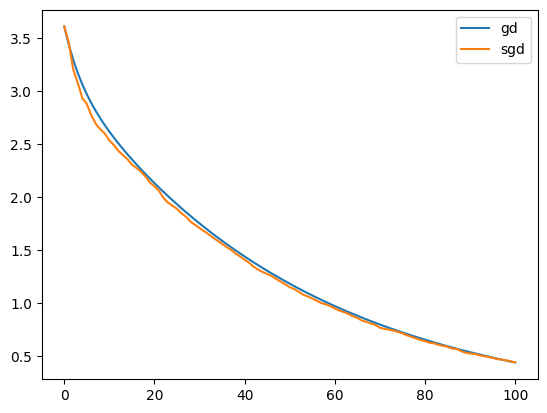

In [267]:
gd_history = gradient_descent(x0, A, B, STEP_SIZE, T)
sgd_history = stochastic_gradient_descent(x0, A, B, STEP_SIZE, T, S)

gd_error = compute_error_history(gd_history)
sgd_error = compute_error_history(sgd_history)
timestamps = np.arange(0, T + 1, 1)

plt.plot(timestamps, gd_error, label="gd")
plt.plot(timestamps, sgd_error, label="sgd")
plt.legend()
plt.show()

In [268]:
gd_history[-1]

array([1.94587889, 2.56223125])

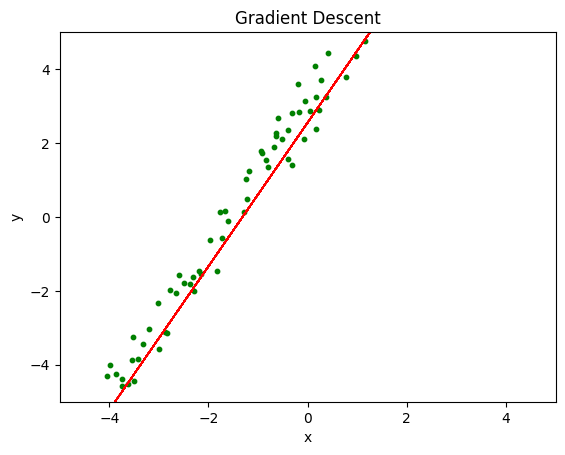

In [269]:
# Animate the line b = x[0]*a + x[1] for each x in the history

fig = plt.figure()
ax = plt.axes(xlim=XLIM, ylim=YLIM)

(line,) = ax.plot([], [], lw=1, c="red")
plt.scatter(A, B, s=10, c="green")

plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    x = gd_history[i]
    y = x[0] * A + x[1]
    line.set_data(A, y)
    return (line,)


anim = FuncAnimation(fig, animate, init_func=init, frames=T, interval=100, blit=True)
HTML(anim.to_html5_video())

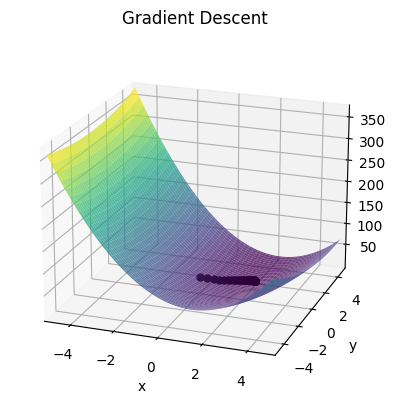

In [270]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z = np.array([loss_func([x,y], A, B) for x,y in zip(X.flatten(),Y.flatten())])
Z = Z.reshape(X.shape)

fig = plt.figure()
ax = plt.axes(projection='3d', xlim=XLIM, ylim=YLIM)
ax.view_init(elev=20, azim=-70)

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.75)
ax.set_xlabel('x(1)')
ax.set_ylabel('x(2)')
ax.set_zlabel('f')

plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")

(scatter, ) = ax.plot([], [], [], c="black", marker="o", linestyle="None", alpha=1, markersize=5)

err = np.array([loss_func(x, A, B) for x in gd_history])

def init():
    scatter.set_data([], [])
    scatter.set_3d_properties([])
    return (scatter,)

def animate(i):
    scatter.set_data(np.array(gd_history)[:i+1, 0], np.array(gd_history)[:i+1, 0])
    scatter.set_3d_properties(err[:i+1])
    return (scatter,)


anim = FuncAnimation(fig, animate, init_func=init, frames=T, interval=100, blit=True)
HTML(anim.to_html5_video())

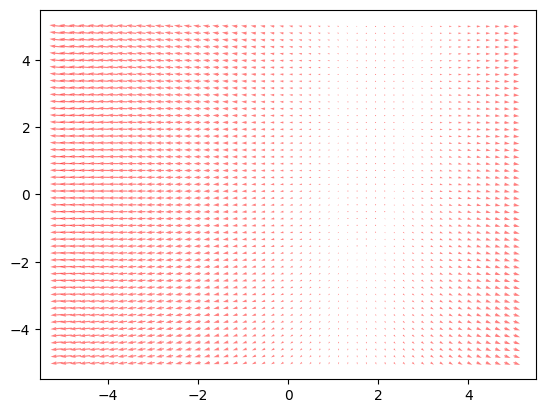

In [271]:
def avg_grad(x, A, B):
    return np.mean([gradient(x, a, b) for a, b in zip(A, B)], axis=0)


P = np.linspace(XLIM[0], XLIM[1], 50)
Q = np.linspace(YLIM[0], YLIM[1], 50)
P,Q = np.meshgrid(P,Q)

Z = np.array([avg_grad([x,y], A, B) for x,y in zip(P.flatten(),Q.flatten())])

plt.quiver(P, Q, Z[:,0], Z[:,1], color='r', alpha=0.5)


